In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Superstore Dataset.csv')

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [4]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
if df.duplicated().sum() > 0:
  print("duplicate data found")
else :
    print("no duplicate found")

types_of_customer= df["Segment"].unique()


1
no duplicate found


['Consumer' 'Home Office' 'Corporate']
  Types of Customer  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


([<matplotlib.patches.Wedge at 0x79365c954160>,
 [Text(-0.06721946235722807, 1.0979442353236368, 'Consumer'),
  Text(-0.5264771818811045, -0.9658269912145397, 'Corporate'),
  Text(0.9318496673774695, -0.5845136417642446, 'Home Office')],
 [Text(-0.036665161285760764, 0.5988786738128927, '51.9%'),
  Text(-0.28716937193514785, -0.526814722480658, '30.2%'),
  Text(0.508281636751347, -0.318825622780497, '17.8%')])

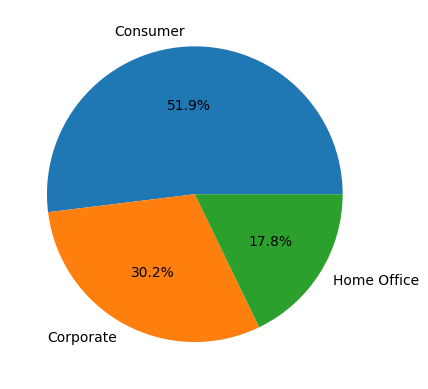

In [5]:
print(types_of_customer)
number_of_customer=df["Segment"].value_counts().reset_index()
number_of_customer=number_of_customer.rename(columns={"Segment":"Types of Customer"})
print(number_of_customer)
plt.pie(number_of_customer['count'],labels=number_of_customer["Types of Customer"],autopct="%1.1f%%")

In [ ]:
sales_per_segment=df.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment=sales_per_segment.rename(columns={"Segment":"Type of Customer","Sales":"Total Sales"})
print(sales_per_segment)

  Type of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.293718e+05


Text(0.5, 1.0, 'Sales per Customer')

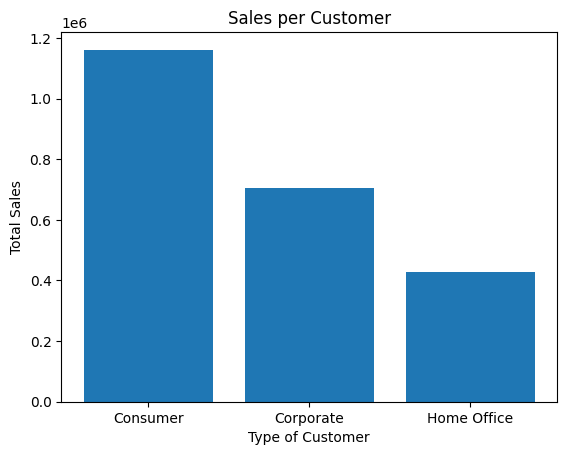

In [ ]:
plt.bar(sales_per_segment["Type of Customer"],sales_per_segment["Total Sales"])
plt.xlabel("Type of Customer")
plt.ylabel("Total Sales")
plt.title("Sales per Customer")

In [ ]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [ ]:

customer_order_frequency= df.groupby(["Customer ID","Customer Name","Segment"])["Order ID"].count().reset_index()
customer_order_frequency=customer_order_frequency.rename(columns={"Order ID":"Total Order"})
customer_repeat=customer_order_frequency[customer_order_frequency["Total Order"]>1]
repeat_customer_sorted=customer_repeat.sort_values(by="Total Order",ascending=False)
print(repeat_customer_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Order
0     WB-21850        William Brown     Consumer           37
1     MA-17560         Matt Abelman  Home Office           34
2     JL-15835             John Lee     Consumer           34
3     PP-18955           Paul Prost  Home Office           34
4     SV-20365          Seth Vernon     Consumer           32
5     JD-15895     Jonathan Doherty    Corporate           32
6     CK-12205  Chloris Kastensmidt     Consumer           32
7     EH-13765         Edward Hooks    Corporate           32
8     EP-13915           Emily Phan     Consumer           31
9     ZC-21910     Zuschuss Carroll     Consumer           31
10    AP-10915       Arthur Prichep     Consumer           31
11    LC-16870        Lena Cacioppo     Consumer           30


In [ ]:
customer_sales=df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
top_customer=customer_sales.sort_values(by="Sales",ascending=False)
print(top_customer.head().reset_index(drop=True))

  Customer ID  Customer Name      Segment      Sales
0    SM-20320    Sean Miller  Home Office  25043.050
1    TC-20980   Tamara Chand    Corporate  19052.218
2    RB-19360   Raymond Buch     Consumer  15117.339
3    TA-21385   Tom Ashbrook  Home Office  14595.620
4    AB-10105  Adrian Barton     Consumer  14473.571


In [ ]:
df.head()
shipping_method=df.groupby(["Ship Mode"])["Order ID"].count().reset_index()
shipping_method=shipping_method.rename(columns={"Order ID":"Total Order"})
shipping_method=shipping_method.sort_values(by="Total Order",ascending=False)
print(shipping_method)

        Ship Mode  Total Order
3  Standard Class         5967
2    Second Class         1945
0     First Class         1538
1        Same Day          543


In [ ]:
shipping_model=df["Ship Mode"].value_counts().reset_index()
shipping_model=shipping_model.rename(columns={"index":"Use Frequency"})
print(shipping_model)

        Ship Mode  count
0  Standard Class   5967
1    Second Class   1945
2     First Class   1538
3        Same Day    543


([<matplotlib.patches.Wedge at 0x7c7444c7ea10>,
 [Text(-0.33043273482043195, 1.0491969346881882, 'Standard Class'),
  Text(-0.3762764767096329, -1.0336421107302978, 'Second Class'),
  Text(0.7464679709401436, -0.8079514641118642, 'First Class'),
  Text(1.084011181256463, -0.1868682929524631, 'Same Day')],
 [Text(-0.18023603717478107, 0.5722892371026481, '59.7%'),
  Text(-0.20524171456889065, -0.5638047876710715, '19.5%'),
  Text(0.40716434778553284, -0.4407007986064714, '15.4%'),
  Text(0.5912788261398889, -0.1019281597922526, '5.4%')])

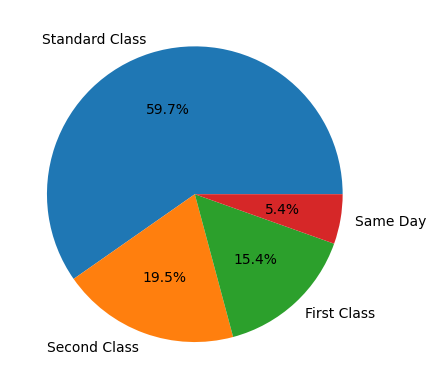

In [ ]:
plt.pie(shipping_model["count"],labels=shipping_model["Ship Mode"],autopct="%1.1f%%")

In [ ]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [ ]:
state=df.groupby(["State"])["Order ID"].count()

print(state)

          State  Order ID
0    California      2001
1      New York      1128
2         Texas       985
3  Pennsylvania       587
4    Washington       506


In [ ]:
product=df["Category"].unique()
print(product)
product_popularity= df.groupby(["Category"])["Sales"].sum().reset_index()
print(product_popularity)
subcategory=df.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()
print(subcategory)

['Office Supplies' 'Furniture' 'Technology']
          Category        Sales
0        Furniture  741718.4233
1  Office Supplies  719047.0320
2       Technology  836154.0330
           Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328167.7310
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5380
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
15       Technology     Machines  189238.6310
16       Technology       Phones  330007.0540

([<matplotlib.patches.Wedge at 0x7c29d50740d0>,
 [Text(0.5808684552772209, 0.9341262428943186, 'Furniture'),
  Text(-1.0908369916757952, 0.1416850648152484, 'Office Supplies'),
  Text(0.4557101492301107, -1.0011634531327391, 'Technology')],
 [Text(0.31683733924212043, 0.5095234052150828, '32.3%'),
  Text(-0.5950019954595246, 0.07728276262649911, '31.3%'),
  Text(0.24856917230733308, -0.5460891562542213, '36.4%')])

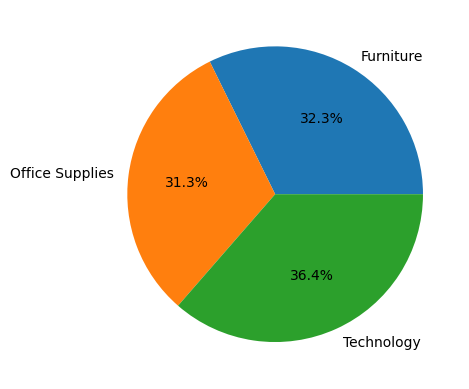

In [ ]:
plt.pie(product_popularity["Sales"],labels=product_popularity["Category"],autopct="%1.1f%%")

In [ ]:
df.head(2)
state_sale=df.groupby(["State"])["Sales"].sum().reset_index()
state_sale=state_sale.rename(columns={"Sales":"Total sales"})
state_sale=state_sale.sort_values(by="Total sales",ascending=False)
print(state_sale.head().reset_index(drop=True))

          State  Total sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140


In [ ]:
city_sale=df.groupby(["City"])["Sales"].sum().reset_index()
city_sale=city_sale.sort_values(by="Sales",ascending=False)
print(city_sale.head().reset_index(drop=True))

            City       Sales
0  New York City  256368.161
1    Los Angeles  175851.341
2        Seattle  119540.742
3  San Francisco  112669.092
4   Philadelphia  109077.013


In [ ]:
top_city_sale=city_sale.head().reset_index(drop=True)
print(top_city_sale)

            City       Sales
0  New York City  256368.161
1    Los Angeles  175851.341
2        Seattle  119540.742
3  San Francisco  112669.092
4   Philadelphia  109077.013


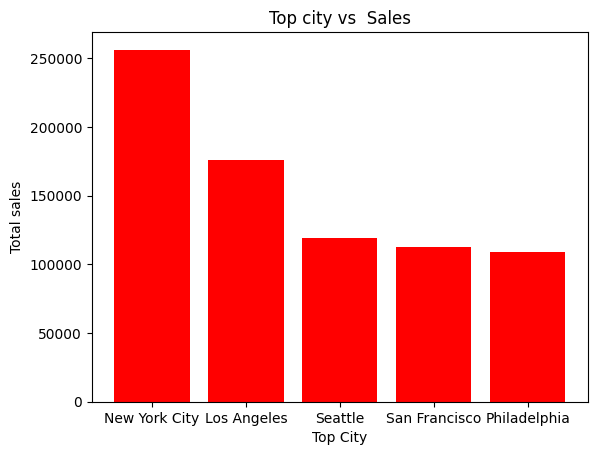

In [ ]:
plt.bar(top_city_sale["City"],top_city_sale["Sales"],color="red")
plt.xlabel("Top City")
plt.ylabel("Total sales")
plt.title("Top city vs  Sales")
plt.show()

In [ ]:

df["Order Date"]= pd.to_datetime(df["Order Date"])
yearly_sales= df.groupby(df["Order Date"].dt.year)["Sales"].sum().reset_index()
yearly_sales=yearly_sales.rename(columns={"Order Date":"Year","Sales":"Total sales"})
print(yearly_sales.head(10).reset_index(drop=True))

   Year  Total sales
0  2019  483966.1261
1  2020  470532.5090
2  2021  609205.5980
3  2022  733215.2552


<BarContainer object of 4 artists>

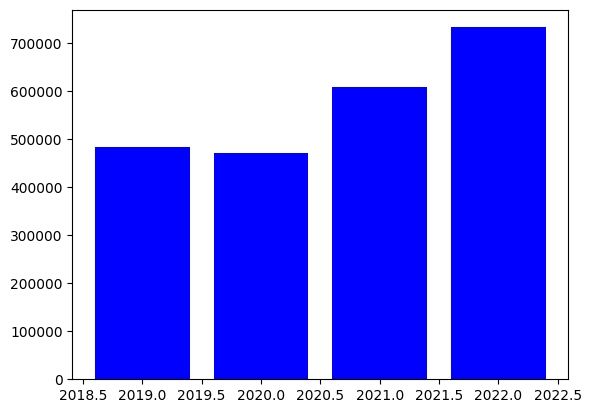

In [ ]:
plt.bar(yearly_sales["Year"],yearly_sales["Total sales"],color="b")

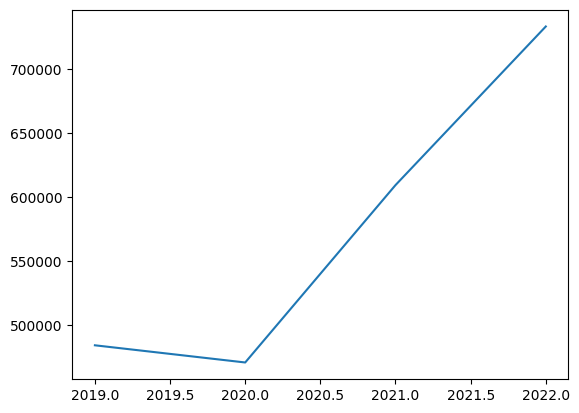

In [ ]:
plt.plot(yearly_sales["Year"],yearly_sales["Total sales"])

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
year_sale=df[df["Order Date"].dt.year ==2019]
quaterly_sales= year_sale.resample("Q",on="Order Date")['Sales'].sum().reset_index()
quaterly_sales=quaterly_sales.rename(columns={"Order Date":"Quater","Sales":"Total Sales"})
print(quaterly_sales)

      Quater  Total Sales
0 2019-03-31   74447.7960
1 2019-06-30   86257.3876
2 2019-09-30  143633.2123
3 2019-12-31  179627.7302


<ipython-input-42-f764acb9950b>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly_sales= year_sale.resample("Q",on="Order Date")['Sales'].sum().reset_index()


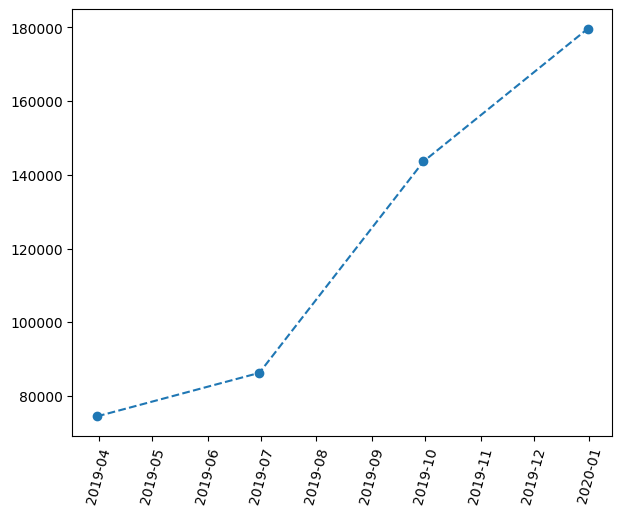

In [ ]:
plt.plot(quaterly_sales["Quater"],quaterly_sales["Total Sales"],marker='o',linestyle="--")
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
yearly_sale=df[df["Order Date"].dt.year ==2019]
monthly_sale=yearly_sale.resample('M',on='Order Date')['Sales'].sum().reset_index()
print(monthly_sale)

   Order Date       Sales
0  2019-01-31  14236.8950
1  2019-02-28   4519.8920
2  2019-03-31  55691.0090
3  2019-04-30  28013.9730
4  2019-05-31  23648.2870
5  2019-06-30  34595.1276
6  2019-07-31  33946.3930
7  2019-08-31  27909.4685
8  2019-09-30  81777.3508
9  2019-10-31  31453.3930
10 2019-11-30  78628.7167
11 2019-12-31  69545.6205


<ipython-input-49-ca55d055967f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sale=yearly_sale.resample('M',on='Order Date')['Sales'].sum().reset_index()


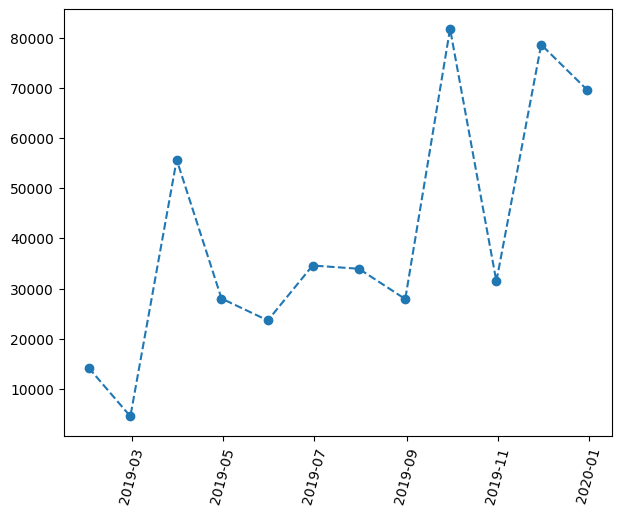

In [ ]:
plt.plot(monthly_sale["Order Date"],monthly_sale["Sales"],marker='o',linestyle="--")
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


Mappping

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio


In [7]:
all_state_mapping={
  "Alabama": "AL",
  "Alaska": "AK",
  "Arizona": "AZ",
  "Arkansas": "AR",
  "California": "CA",
  "Colorado": "CO",
  "Connecticut": "CT",
  "Delaware": "DE",
  "Florida": "FL",
  "Georgia": "GA",
  "Hawaii": "HI",
  "Idaho": "ID",
  "Illinois": "IL",
  "Indiana": "IN",
  "Iowa": "IA",
  "Kansas": "KS",
  "Kentucky": "KY",
  "Louisiana": "LA",
  "Maine": "ME",
  "Maryland": "MD",
  "Massachusetts": "MA",
  "Michigan": "MI",
  "Minnesota": "MN",
  "Mississippi": "MS",
  "Missouri": "MO",
  "Montana": "MT",
  "Nebraska": "NE",
  "Nevada": "NV",
  "New Hampshire": "NH",
  "New Jersey": "NJ",
  "New Mexico": "NM",
  "New York": "NY",
  "North Carolina": "NC",
  "North Dakota": "ND",
  "Ohio": "OH",
  "Oklahoma": "OK",
  "Oregon": "OR",
  "Pennsylvania": "PA",
  "Rhode Island": "RI",
  "South Carolina": "SC",
  "South Dakota": "SD",
  "Tennessee": "TN",
  "Texas": "TX",
  "Utah": "UT",
  "Vermont": "VT",
  "Virginia": "VA",
  "Washington": "WA",
  "West Virginia": "WV",
  "Wisconsin": "WI",
  "Wyoming": "WY"
}


add abbreviation column to dataframe


In [8]:
df['Abbreviation']=df['State'].map(all_state_mapping)

group by state and add abbrebiation to sum of sales

In [9]:
sum_of_sales=df.groupby('State')['Sales'].sum().reset_index()
sum_of_sales['Abbreviation']=sum_of_sales['State'].map(all_state_mapping)

creating choropleth map using plotly

In [10]:
fig=go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    colorscale='Reds',
    colorbar_title='Sales',
    showscale=True
))
fig.update_geos(projection_type='albers usa')
fig.update_layout(
    geo_scope='usa',
    title='Total sales by us state'
)
fig.show()

nested pie chart

In [11]:
df_summery=df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
fig=px.sunburst(df_summery,path=['Category','Sub-Category'],values='Sales')
fig.show()

tree map

In [14]:
df_summery=df.groupby(['Category','Ship Mode','Sub-Category'])['Sales'].sum().reset_index()
fig=px.treemap(df_summery,path=['Category','Ship Mode','Sub-Category'],values='Sales')
fig.show()